## Introduction To Artificial Neural Network

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
X_train[0].shape

(28, 28)

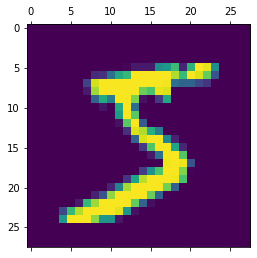

In [5]:
plt.matshow(X_train[0])
# 28 by 28 pixels input data

In [6]:
y_train[0]
# 5 is the lable to that data

5

In [7]:
# Now we flatten that 28*28 size image array in to single one diamentional array
# i.e. 28*28 = 784 neurons as features in input

In [8]:
X_train.shape
# this is original dimention of imput data(60000,28,28)    
# i.e. (len(X_train),diam1 * diam2)

(60000, 28, 28)

In [9]:
X_train = X_train/255
X_test = X_test/255
# uncomment this when scaling the data

In [10]:
# Now we reshape that input using pandas reshape function
X_train.reshape(len(X_train),784)
# this convert each image out of 60000 in to one array of size 784

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
# Now we store that array in to some variable
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_train_flatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
X_train_flatten.shape

(60000, 784)

In [13]:
# similarly with X_test
X_test_flatten = X_test.reshape(len(X_test),28*28)

In [14]:
X_test_flatten.shape

(10000, 784)

In [15]:
X_train_flatten[0]
# This is the flatten array of elements 784 represents image of '5'

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
# Now we create a simple neural network with only 2 layers (No hodden layer)
# keras.Sequential([keras.layers.dense('output size','input size','activation function')])  //syntax of keras.Sequential
# Sequential add the layers to the network 
# dense means each neuron in previous layer is connected to each neuron in next layer
model = keras.Sequential([
    
#       keras.layers.Dense(10,input_shape = (784,),activation = 'sigmoid')
    keras.layers.Dense(200,input_shape = (784,),activation = 'sigmoid'),
    keras.layers.Dense(100,activation = 'sigmoid'),
    keras.layers.Dense(10,activation = 'sigmoid')
#     comment first layer laine and uncomment others to add hidden layers to network

])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flatten,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4028 - accuracy: 0.8914
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1615 - accuracy: 0.9522
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1097 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0786 - accuracy: 0.9766
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0591 - accuracy: 0.9818


In [17]:
# Now lets evaluate accuracy on test dataset
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 0s 877us/step - loss: 0.0770 - accuracy: 0.9743


[0.07701737433671951, 0.9743000268936157]

In [18]:
# to increase the accuracy we can scale the x_train and y_train datasets in to range 0-1 by dividing it by 255
# 255 is the largest value in the array
# after scaling accuracy is 97%

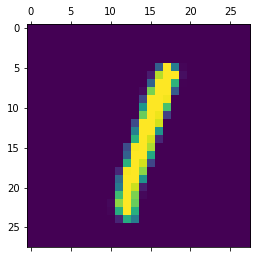

In [19]:
plt.matshow(X_test[5])

In [20]:
predicted = model.predict(X_test_flatten)
predicted[5]

array([0.00506166, 0.99991286, 0.09187821, 0.09649727, 0.10695416,
       0.02497792, 0.00581527, 0.68772125, 0.36790842, 0.12846187],
      dtype=float32)

In [21]:
# to convert predicted into integer labels
predicted_lab = [np.argmax(i) for i in predicted ]

In [22]:
np.argmax(predicted[5])

1

In [23]:
truth = y_test

In [24]:
cm = tf.math.confusion_matrix(labels = truth , predictions = predicted_lab)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    1,    1,    2,    2,    1,    1,    0],
       [   0, 1126,    3,    1,    0,    1,    1,    0,    3,    0],
       [   6,    4, 1003,    2,    1,    0,    3,    7,    6,    0],
       [   0,    1,    3,  991,    0,    4,    0,    7,    2,    2],
       [   3,    0,    2,    1,  945,    0,    4,    3,    0,   24],
       [   4,    0,    0,   15,    2,  864,    4,    0,    1,    2],
       [  10,    3,    1,    0,    3,    6,  934,    0,    1,    0],
       [   1,    7,    9,    0,    0,    0,    0, 1001,    0,   10],
       [   9,    1,    1,    7,    4,   10,    3,    5,  931,    3],
       [   4,    4,    0,    7,    5,    6,    0,    5,    1,  977]])>

<AxesSubplot:>

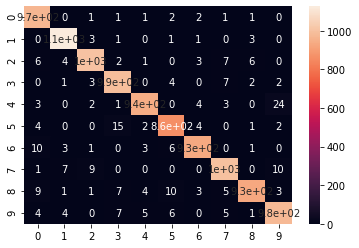

In [25]:
import seaborn as sn
sn.heatmap(cm,annot=True)